In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

In [3]:
df = pd.read_csv('../dataset/subtitles_dataset_tokenized.csv')
crew_df = pd.read_csv('../dataset/crew.tsv', sep='\t')

In [4]:
crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [5]:
crew_df.shape

(6776644, 3)

In [6]:
df.shape

(46468, 9)

In [7]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration
0,0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,1147427,"Comedy,Family,Romance",0,NaN,untokenisiert,NaN
1,1,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294864,"Animation,Comedy",0,NaN,untokenisiert,NaN
2,2,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294865,"Animation,Comedy",0,NaN,untokenisiert,NaN
3,3,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,1328700,"Animation,Comedy",0,NaN,untokenisiert,NaN
4,4,6979068.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1328701,"Animation,Comedy",0,NaN,untokenisiert,NaN


In [8]:
# merge datasets
crew_df['IMDB_ID'] = crew_df.tconst.apply(lambda x: int(x.replace('tt', '')))
df = df.merge(right=crew_df, on='IMDB_ID', how='outer')
#df = df.drop(['directors_x', 'writers_x', 'directors_y', 'writers_y'], axis=1)
df = df.drop('tconst', axis=1)
df = df.replace(r'\N', np.nan)

In [9]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers
0,0.0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,1147427,"Comedy,Family,Romance",0.0,NaN,untokenisiert,NaN,nm0240047,nm0226201
1,1.0,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294864,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm0509769,nm0537542,nm0875635"
2,2.0,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294865,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm0537542,nm0875635"
3,3.0,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,1328700,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm0247695,nm0537542,nm0875635"
4,4.0,6979068.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1328701,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm2243388,nm0537542,nm0875635"


In [10]:
df.shape[0] - df.dropna(subset=['writers', 'directors']).shape[0]

3745418

In [11]:
df.dropna(subset=['genre', 'year', 'production_region', 'duration']).shape

(18277, 11)

In [12]:
df.shape[0] - df.dropna(subset=['text']).shape[0]

6742258

In [17]:
df.dropna(inplace=True)
df.shape

(18102, 11)

In [18]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers
79,79.0,6581015.xml,hinter der leiwand die anwendung für die arbei...,6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,nm0000122,"nm0117018,nm0000122,nm1176713"
80,80.0,6564964.xml,der graf maße : hals 30 cm - ohr - 4 cm mounth...,6548,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
82,82.0,6412883.xml,"chaplin bei der feuerwehr "" lass doch das haus...",6684,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0000122,nm0117018,nm1176713"
85,85.0,6565009.xml,der abenteurer der mann jagd . ein morgendlich...,7613,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
86,86.0,6564950.xml,die heilquelle die gesundheit frühling la moll...,7832,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"


In [19]:
# text preprocessing
import re
df['text'] = df.text.str.lower()
df['text'] = [re.sub(r'\d+', '', text) for text in df.text]

In [20]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers
79,79.0,6581015.xml,hinter der leiwand die anwendung für die arbei...,6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,nm0000122,"nm0117018,nm0000122,nm1176713"
80,80.0,6564964.xml,"der graf maße : hals cm - ohr - cm mounth , ...",6548,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
82,82.0,6412883.xml,"chaplin bei der feuerwehr "" lass doch das haus...",6684,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0000122,nm0117018,nm1176713"
85,85.0,6565009.xml,der abenteurer der mann jagd . ein morgendlich...,7613,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
86,86.0,6564950.xml,die heilquelle die gesundheit frühling la moll...,7832,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"


# Publishing year

In [ ]:
df.year = df.year.astype('int')
df.year.describe()

In [ ]:
year_bins = df.year.max() - df.year.min()
year_bins

In [ ]:
plt.figure(figsize=(12,7))
df.year.plot(kind='hist', bins=int(year_bins))

# Genre

## Unique combinations

In [18]:
df.genre.unique().shape

(576,)

In [19]:
from collections import Counter
genre_combination_frequs = Counter(df.genre)
genre_combination_frequs.most_common(20)

[('Drama', 1201),
 ('Comedy', 808),
 ('Drama,Romance', 615),
 ('Comedy,Drama,Romance', 571),
 ('Comedy,Drama', 546),
 ('Action,Crime,Drama', 456),
 ('Comedy,Romance', 415),
 ('Crime,Drama,Thriller', 366),
 ('Horror', 333),
 ('Crime,Drama', 292),
 ('Action,Crime,Thriller', 285),
 ('Action,Adventure,Sci-Fi', 273),
 ('Action,Comedy,Crime', 251),
 ('Drama,Thriller', 242),
 ('Crime,Drama,Mystery', 234),
 ('Action,Adventure,Drama', 229),
 ('Action,Adventure,Comedy', 208),
 ('Action,Adventure,Fantasy', 206),
 ('Horror,Thriller', 199),
 ('Comedy,Crime', 186)]

## Single genres

In [20]:
import re 
single_genres = set([re.sub(r'\s+', '', genre) for entry in df.genre.str.split(',') for genre in entry])
single_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [21]:
len(single_genres)

25

dtype('O')

# Production Region

## Combinations

In [22]:
df.production_region.unique()

array(['English', 'Swedish', 'German', ..., 'Chinese, English',
       'Spanish, English, Icelandic, Portuguese',
       'Hebrew, English, Persian'], dtype=object)

In [23]:
df.production_region.unique().shape

(1227,)

In [24]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

[('English', 8145),
 ('French', 1030),
 ('German', 930),
 ('Japanese', 617),
 ('English, Spanish', 528),
 ('Italian', 394),
 ('English, French', 386),
 ('Spanish', 204),
 ('English, Italian', 171),
 ('English, German', 163),
 ('English, Russian', 155),
 ('Korean', 148),
 ('English, Japanese', 125),
 ('French, English', 119),
 ('Cantonese', 117),
 ('Russian', 114),
 ('Mandarin', 110),
 ('Swedish', 103),
 ('Turkish', 78),
 ('English, Arabic', 68)]

## Single regions

In [25]:
single_region = set([re.sub(r'\s+', '', region) for entry in df.production_region.str.split(',') for region in entry])
single_region

{'Aboriginal',
 'Acholi',
 'Afrikaans',
 'Albanian',
 'Algonquin',
 'AmericanSignLanguage',
 'Amharic',
 'Ancient(to1453)',
 'Apachelanguages',
 'Arabic',
 'Aramaic',
 'Arapaho',
 'Armenian',
 'AssyrianNeo-Aramaic',
 'Athapascanlanguages',
 'Aymara',
 'Azerbaijani',
 'Bable',
 'Bambara',
 'Basque',
 'Belarusian',
 'Bengali',
 'Berberlanguages',
 'Bhojpuri',
 'Bosnian',
 'BrazilianSignLanguage',
 'Breton',
 'BritishSignLanguage',
 'Bulgarian',
 'Burmese',
 'Cantonese',
 'Catalan',
 'Chechen',
 'Chinese',
 'Corsican',
 'Cree',
 'Creole',
 'Creolesandpidgins',
 'Croatian',
 'Crow',
 'Czech',
 'Danish',
 'Dari',
 'Dutch',
 'Egyptian(Ancient)',
 'English',
 'Esperanto',
 'Estonian',
 'Faroese',
 'Filipino',
 'Finnish',
 'Flemish',
 'French',
 'FrenchSignLanguage',
 'Fulah',
 'Gallegan',
 'Georgian',
 'German',
 'GermanSignLanguage',
 'Greek',
 'Greenlandic',
 'Guarani',
 'Gujarati',
 'Hakka',
 'Hawaiian',
 'Hebrew',
 'Hindi',
 'Hmong',
 'Hokkien',
 'Hungarian',
 'Icelandic',
 'Indonesian',


In [26]:
len(single_region)

170

# PCA

In [81]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

In [82]:
tfidf = TfidfVectorizer(max_features=10000, stop_words=get_stop_words('de'))
X = tfidf.fit_transform(df.text)

In [83]:
pca = PCA(n_components=2)
Xr = pca.fit_transform(X.todense())

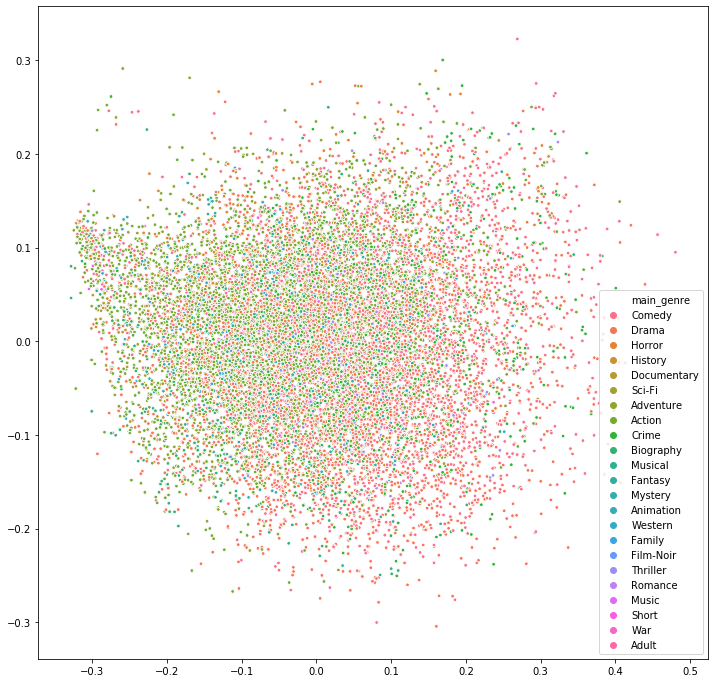

In [84]:
import seaborn as sns
plt.figure(figsize=(12,12))
df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])
sns.scatterplot(Xr[:,0], Xr[:,1], hue=df.main_genre, marker='.', s=50)
plt.show()

In [85]:
def filter_by_genre(row, genres=['Drama', 'Comedy']):
    for genre in genres:
        if genre in row.main_genre:
            return True
    return False
mask = df.apply(filter_by_genre, axis=1)
mask

79        True
80        True
82        True
85        True
86        True
         ...  
45387    False
45388     True
45395    False
45396    False
45397    False
Length: 18102, dtype: bool

In [99]:
df_filter_genre = df[mask]
df_filter_genre = df_filter_genre[df_filter_genre.year >= 2010]
df_filter_genre.shape

(1716, 12)

In [100]:
tfidf = TfidfVectorizer(max_features=10000, stop_words=get_stop_words('de'))
Xf = tfidf.fit_transform(df_filter_genre.text)

In [101]:
pca = PCA(n_components=2)
Xfr = pca.fit_transform(Xf.todense())

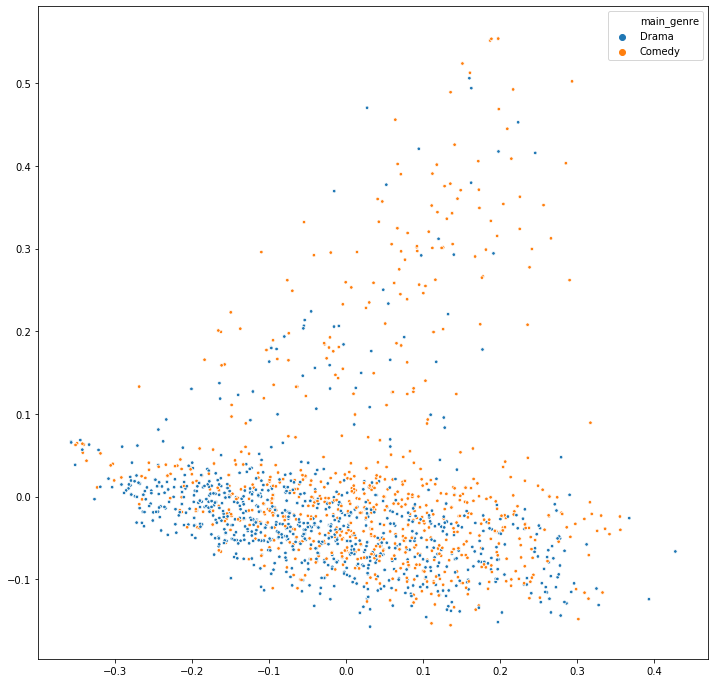

In [102]:
import seaborn as sns
plt.figure(figsize=(12,12))
df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])
sns.scatterplot(Xfr[:,0], Xfr[:,1], hue=df_filter_genre.main_genre, marker='.', s=50)
plt.show()

# Umap

In [67]:
import umap
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
#sample, remove = train_test_split(df_filter_genre, test_size=0.8, random_state=42)

tfidf = TfidfVectorizer(max_features=10000)

X_sample = tfidf.fit_transform(df_filter_genre.text)

In [74]:
reducer = umap.UMAP(n_components=2, n_neighbors=15)
Xru = reducer.fit_transform(X_sample)

TypeError: not enough arguments: expected 4, got 2

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.scatterplot(Xru[:,0], Xru[:,1], hue=df_filter_genre.main_genre, marker='.', s=50)
plt.show()

# Isomap

In [57]:
from sklearn.manifold import Isomap

iso_reducer = Isomap(n_components=2, n_jobs=-1)
Xri = iso_reducer.fit_transform(X)

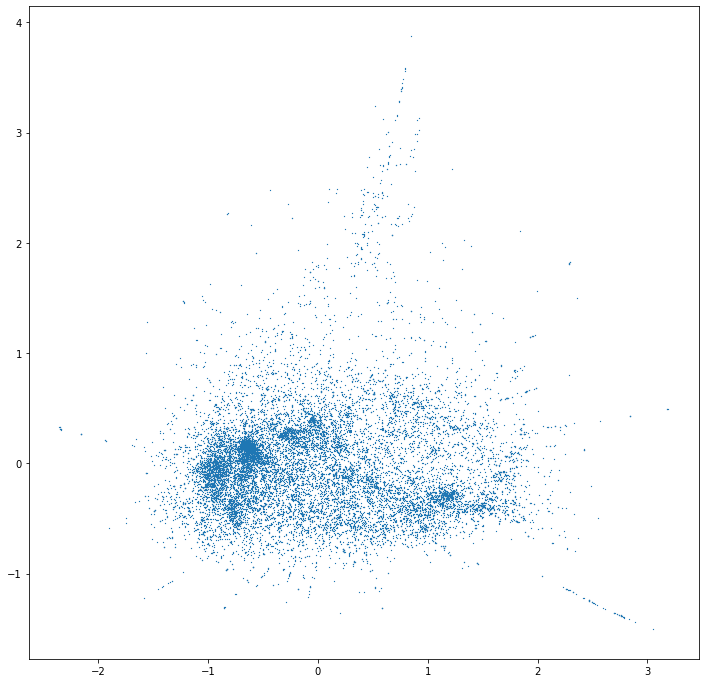

In [58]:
plt.figure(figsize=(12,12))
plt.scatter(Xri[:,0], Xri[:,1], s=0.1, marker='x')
plt.show()

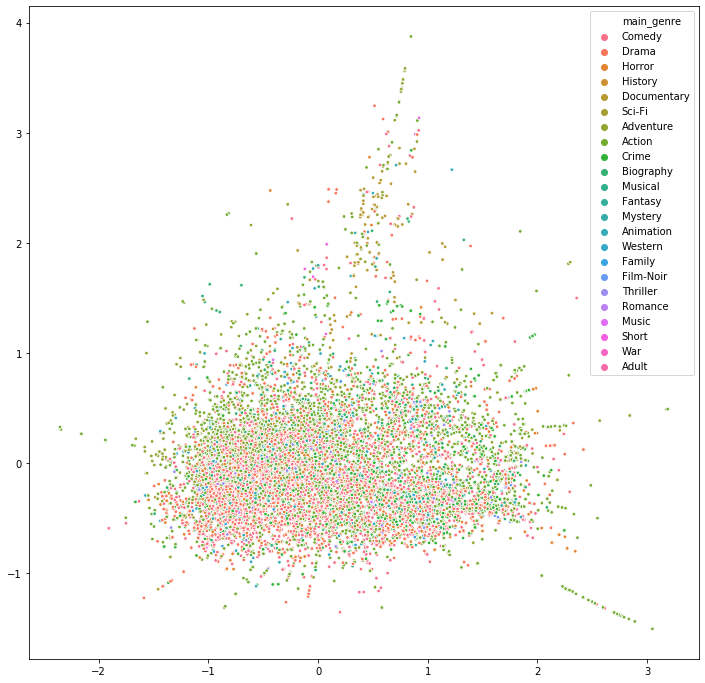

In [70]:
import seaborn as sns
plt.figure(figsize=(12,12))
df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])
sns.scatterplot(Xri[:,0], Xri[:,1], hue=df.main_genre, marker='.', s=50)
plt.show()

# Plots

In [31]:
import seaborn as sns

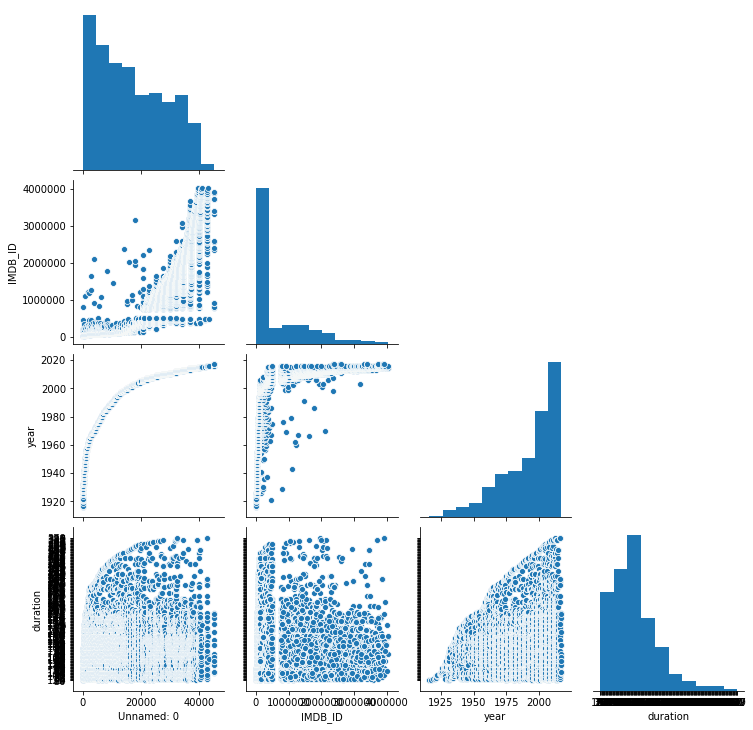

In [32]:
grid = sns.pairplot(df, corner=True)

In [21]:
import re
df['main_region'] = [
    'English' if "English" in list(map(lambda x: re.sub(r'\s+','', x), production_region.split(','))) else "Other" for production_region in df.production_region
]

In [22]:
df_nf = df[df.year >= 2010]
#df_nf = df_nf[(df_nf.main_region == 'English') | (df_nf.main_region != 'English')]
df_nf.shape

(4094, 12)

In [23]:
df_nf.groupby('main_region').describe()

Unnamed: 0                                                         \
                 count          mean          std      min       25%      50%   
main_region                                                                     
English         2842.0  33975.063688  3999.456102  27776.0  30556.25  33888.5   
Other           1252.0  33764.823482  3817.943130  27794.0  30724.75  33443.0   

                               IMDB_ID                ...              \
                  75%      max   count          mean  ...         75%   
main_region                                           ...               
English      37219.75  45397.0  2842.0  1.866591e+06  ...  2245038.25   
Other        36771.00  45377.0  1252.0  2.294490e+06  ...  2800718.50   

                          year                                                 \
                   max   count         mean       std     min     25%     50%   
main_region                                                                     
English      4019560.0  2842.0  2012.435257  1.656384  2010.0  2011.0  2012.0   
Other        4023074.0  1252.0  2012.154153  1.589647  2010.0  2011.0  2012.0   

                             
                75%     max  
main_region                  
English      2014.0  2017.0  
Other        2013.0  2017.0  

[2 rows x 24 columns]

In [24]:
df_nf.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,main_region
27776,27776.0,6099095.xml,so erbärmlich ! so erbärmlich ! in einem momen...,1006907,Horror,2010.0,English,untokenisiert,91,nm1726852,nm1726852,English
27777,27777.0,4667306.xml,anpassung von madmax für knight.and.day..exten...,1013743,"Action,Comedy,Romance",2010.0,"English, German, Spanish",untokenisiert,109,nm0003506,nm0642277,English
27778,27778.0,6181411.xml,"miss , ich will nach hause . ja , ich bin glei...",1013743,"Action,Comedy,Romance",2010.0,"English, German, Spanish",untokenisiert,109,nm0003506,nm0642277,English
27779,27779.0,4156261.xml,"charles , jetzt haben sie endgültig den versta...",1014759,"Adventure,Family,Fantasy",2010.0,English,untokenisiert,108,nm0000318,"nm0941314,nm0140902",English
27780,27780.0,5080976.xml,"alice im wunderland charles , sie haben endgül...",1014759,"Adventure,Family,Fantasy",2010.0,English,untokenisiert,108,nm0000318,"nm0941314,nm0140902",English


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

tfidf = TfidfVectorizer(stop_words=get_stop_words('de'), max_features=6500)
X = tfidf.fit_transform(df_nf.text)

In [26]:
from yellowbrick.text import UMAPVisualizer

umap = UMAPVisualizer(metric='cosine', n_neighbors=100)
umap.fit(X, df_nf.main_region)
plt.figure(figsize=(15, 15))
umap.show()

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


KeyboardInterrupt: 

In [28]:
import spacy
import re
import numpy as np
from sklearn.base import TransformerMixin
from typing import Iterable, List
from tqdm import tqdm

class POSTransformer(TransformerMixin):
    
    def __init__(self, spacy_model: str ='de_core_news_sm', verbose: bool = False, *args, **kwargs):
        self.spacy_model = spacy_model
        self.verbose = verbose 
        super().__init__(*args, **kwargs)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X: Iterable[str],  y=None):
        pos_tags = set()
        nlp = spacy.load(self.spacy_model)
        Xt = []
        X = tqdm(X) if self.verbose else X
        for x in X:
            doc = nlp(x)
            Xt.append(" ".join([token.pos_ for token in doc]))
        self.tags__ = list(pos_tags)
        return Xt

class SentenceMarkCounter(TransformerMixin):
    
    def __init__(self,
                 marks: List[str] = None,
                 normalize: bool = True,
                 verbose: bool = False,
                 *args,
                 **kwargs):
        self.marks = marks if marks else [r'\.', r'\?', r'!', r'\.{3}']
        self.verbose = verbose
        self.normalize = normalize
        super().__init__(*args, **kwargs)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        Xt = []
        X = tqdm(X) if self.verbose else X
        for x in X:
            xt = np.array([len(re.findall(mark, x)) for mark in self.marks])
            if self.normalize:
                xt = xt / len(x)
            Xt.append(xt)
        return np.asarray(Xt)        

In [ ]:
pos_transformer = POSTransformer(verbose=True)
df_nf['pos_tags'] = pos_transformer.fit_transform(df_nf.text)

  8%|▊         | 328/4094 [04:08<56:14,  1.12it/s]  